<a href="https://colab.research.google.com/github/nitin-khandagale/machine_learning_practice/blob/master/bag_of_words_stemming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import plotly.express as px
import re

In [2]:
link = "https://www.hopefully.live/post/catboost-vs-xgboost-credit-risk-calculation"

In [3]:
parse = requests.get(link)

In [5]:
soup = BeautifulSoup(parse.content)

In [21]:
body = soup.find_all('p')

In [27]:
len(body)

17

In [120]:
data = []

for p in body:
  data.append(p.get_text())

In [121]:
data

['Updated: Jun 26',
 'Catboost and XGBoost are the two titans of gradient boosting technique. Today we will be using German credit risk dataset from kaggle to compare the performance of these two. We also will be using GridSearchCV to tune the parameters to get the best out of them. You can download the file straight up from here',
 'Lets import the necessary modules and read the file.',
 'have closer look at our database',
 'Lets split our data into training and testing sets. We could have cleaned missing values first before splitting but that would be easy task to our model to understand the output. We will split the data first then encode it separately .',
 'Now that our data is separated, x_train and y_train is filled with categorical columns and missing data. We will use Target Encoding to get rid of these missing data and categorical features at once. Lets get all the categorical columns we have first.',
 'Lets encode the categorical columns',
 'Now we join the these encoded colu

In [122]:
len(data)

17

In [123]:
for line in range(len(data)):
  data[line] = re.sub("\d", '', data[line])

In [124]:
data = ''.join(data)
data

"Updated: Jun Catboost and XGBoost are the two titans of gradient boosting technique. Today we will be using German credit risk dataset from kaggle to compare the performance of these two. We also will be using GridSearchCV to tune the parameters to get the best out of them. You can download the file straight up from hereLets import the necessary modules and read the file.have closer look at our databaseLets split our data into training and testing sets. We could have cleaned missing values first before splitting but that would be easy task to our model to understand the output. We will split the data first then encode it separately .Now that our data is separated, x_train and y_train is filled with categorical columns and missing data. We will use Target Encoding to get rid of these missing data and categorical features at once. Lets get all the categorical columns we have first.Lets encode the categorical columnsNow we join the these encoded columns and remove original encoded column

In [125]:
len(data)

1957

In [126]:
data_without_symbols = re.sub("\W+", ' ', data)

In [129]:
data_without_symbols

'updated jun catboost and xgboost are the two titans of gradient boosting technique today we will be using german credit risk dataset from kaggle to compare the performance of these two we also will be using gridsearchcv to tune the parameters to get the best out of them you can download the file straight up from herelets import the necessary modules and read the file have closer look at our databaselets split our data into training and testing sets we could have cleaned missing values first before splitting but that would be easy task to our model to understand the output we will split the data first then encode it separately now that our data is separated x_train and y_train is filled with categorical columns and missing data we will use target encoding to get rid of these missing data and categorical features at once lets get all the categorical columns we have first lets encode the categorical columnsnow we join the these encoded columns and remove original encoded columnslets have

In [128]:
len(data_without_symbols)

1918

In [134]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [140]:
words = word_tokenize(data_without_symbols.lower())
words[:10]

['updated',
 'jun',
 'catboost',
 'and',
 'xgboost',
 'are',
 'the',
 'two',
 'titans',
 'of']

In [143]:
len(words)

328

In [133]:
stop_words = stopwords.words('english')

In [145]:
data_without_sw = [word for word in words if not word in stop_words]
data_without_sw[:10]

['updated',
 'jun',
 'catboost',
 'xgboost',
 'two',
 'titans',
 'gradient',
 'boosting',
 'technique',
 'today']

In [146]:
len(data_without_sw)

180

In [162]:
from nltk.stem import PorterStemmer

In [163]:
porter = PorterStemmer()

In [168]:
stem_words = []

for word in data_without_sw:
  stem_words.append(porter.stem(word))

In [171]:
len(stem_words)

180

In [177]:
stem_words[:10]

['updat',
 'jun',
 'catboost',
 'xgboost',
 'two',
 'titan',
 'gradient',
 'boost',
 'techniqu',
 'today']

In [188]:
counts = {}

for word in stem_words:
  if word not in counts.keys():
    counts[word] = 1
  else:
    counts[word] += 1

In [200]:
x = list(counts.keys())
y = list(counts.values())

In [208]:
import heapq

top = heapq.nlargest(10, counts, key = counts.get)

In [209]:
top_count = []

for t in top:
  top_count.append(counts[t])

In [210]:
top_count

[9, 5, 5, 5, 5, 4, 4, 4, 3, 3]

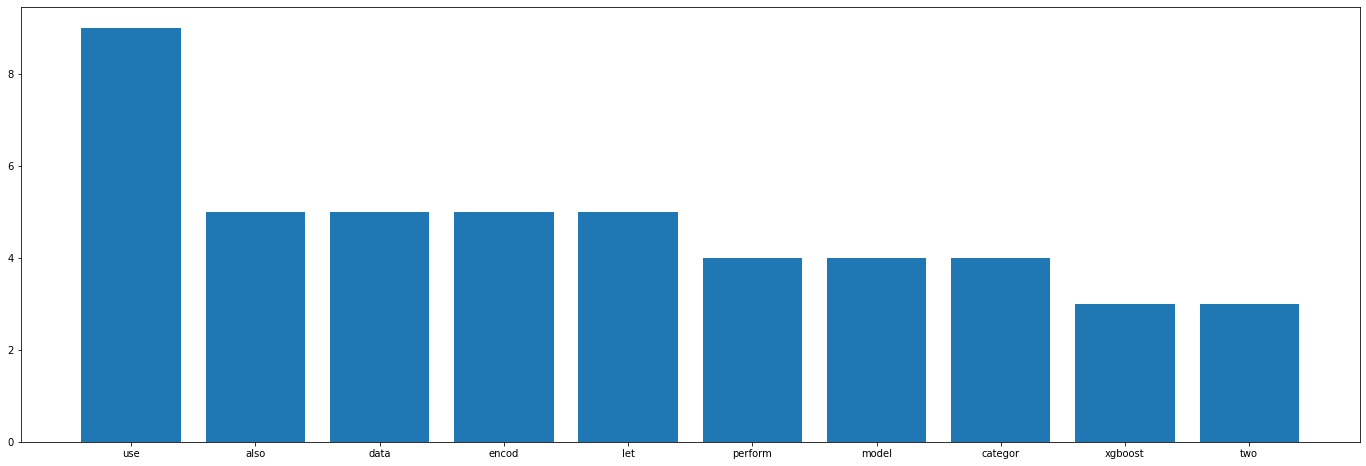

In [212]:
plt.figure(figsize=(24,8))

plt.bar(top, top_count)
plt.show()
